[B1] Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:

1. Pre-process the dataset.

2. Check the correlation.

3. Implement linear regression and random forest regression models.

4. Evaluate the models and compare their respective scores like R2, RMSE, etc.

Step 1: Import Required Libraries

In [ ]:
# Import essential libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.ensemble import RandomForestRegressor  # Random forest regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation
from sklearn.preprocessing import LabelEncoder # For  Conversion of categorical variable
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings('ignore')

Step 2: Load and Inspect Dataset

In [ ]:
# Load dataset
df = pd.read_csv(uber.csv)  # Replace with your dataset path

# View first few rows
df.head()


Step 3: Preprocess the Dataset

In [13]:
# Check for missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
# Fill or drop missing values
df.dropna(inplace=True)  # Dropping rows with missing values for simplicity

In [15]:
# Check for missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [16]:
# Convert the pickup_datetime column to datetime format, if not done already
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [17]:
# Drop rows where conversion failed (e.g., invalid date formats)
df.dropna(subset=['pickup_datetime'], inplace=True)

In [18]:
# Extract useful features from datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek
df.drop(columns=['pickup_datetime'], inplace=True)

In [19]:
# Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() > 100:
        df[col] = LabelEncoder().fit_transform(df[col])  # High-cardinality: LabelEncoder
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)  # Low-cardinality: get_dummies



In [20]:

# Verify all columns are now numeric
print(df.dtypes)


Unnamed: 0             int64
key                    int32
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
pickup_hour            int32
pickup_day             int32
dtype: object


In [21]:
# View the dataset
df.head()

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day
0,24238194,195991,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,27835199,16590,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,44984355,19677,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,25894730,14916,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,17610152,176170,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3


Step 4: Check Correlation

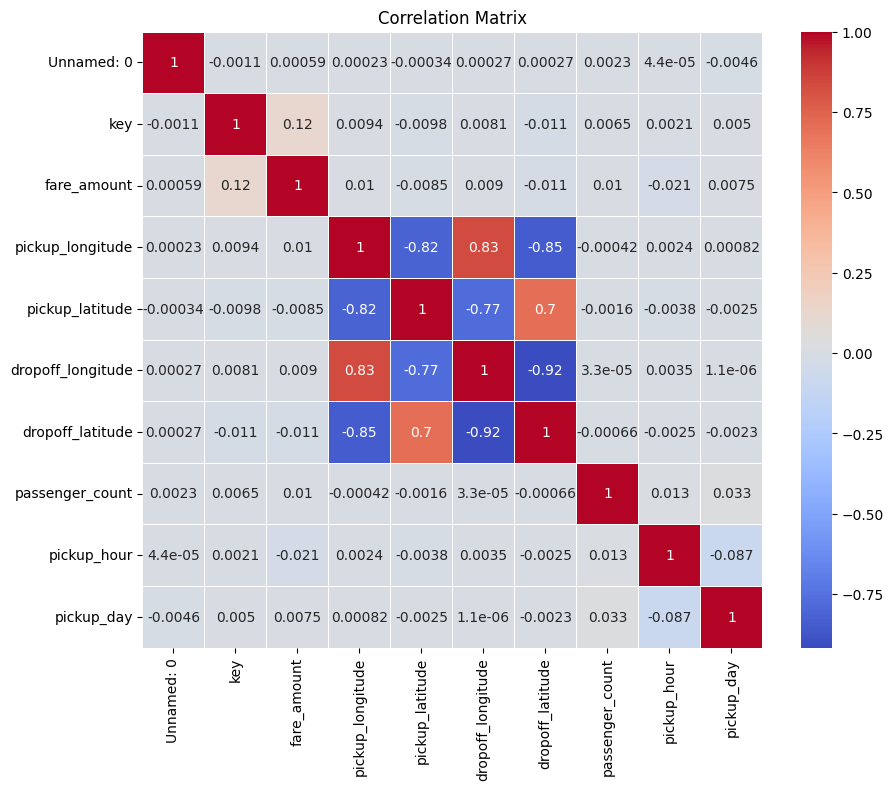

In [22]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Step 5: Define Features and Target Variable

In [23]:
# Define target variable and features
X = df.drop(columns=['fare_amount'])  # Drop the target column
y = df['fare_amount']  # Target variable

Step 6: Split Dataset into Training and Testing Sets

In [24]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 7: Implement Linear Regression Model

In [25]:
# Handle missing values by imputing them
imputer = SimpleImputer(strategy='mean')  # Use mean to fill NaN values
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [26]:
# Initialize and train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(X_test)

Step 8: Implement Random Forest Regression Model

In [27]:
# Initialize and train random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

Step 9: Evaluate and Compare Models

In [28]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

In [29]:
# Evaluate linear regression model
r2_linear, rmse_linear = evaluate_model(y_test, y_pred_linear)
print(f"Linear Regression -> R2 Score: {r2_linear:.2f}, RMSE: {rmse_linear:.2f}")

Linear Regression -> R2 Score: 0.02, RMSE: 10.11


In [30]:
# Evaluate random forest model
r2_rf, rmse_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest Regression -> R2 Score: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}")

Random Forest Regression -> R2 Score: 0.73, RMSE: 5.33


Step 10: Visualize Model Comparisons

In [31]:
# Compare model performances
model_names = ['Linear Regression', 'Random Forest']
r2_scores = [r2_linear, r2_rf]
rmse_scores = [rmse_linear, rmse_rf]

In [32]:
# Plot R2 and RMSE comparison
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'R2 Score')

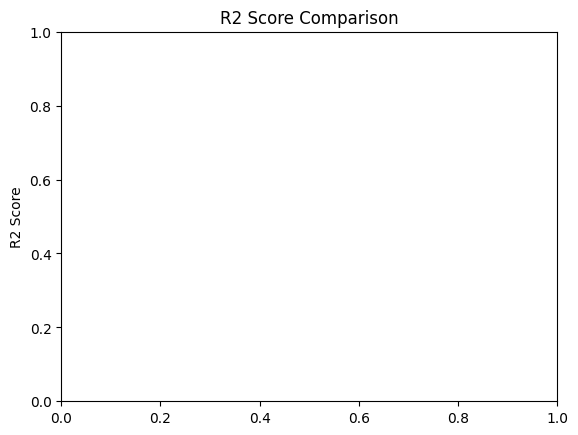

In [33]:
# R2 Score Comparison
plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")

Text(0, 0.5, 'RMSE')

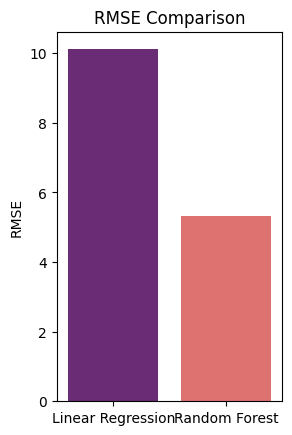

In [39]:
# RMSE Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=rmse_scores, palette='magma')
plt.title("RMSE Comparison")
plt.ylabel("RMSE")

In [35]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>